<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Откройте-файлы-с-данными" data-toc-modified-id="Откройте-файлы-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Откройте файлы с данными</a></span></li><li><span><a href="#Предобработка-и-исследовательский-анализ-данных" data-toc-modified-id="Предобработка-и-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка и исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Категориальные-данные" data-toc-modified-id="Категориальные-данные-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Категориальные данные</a></span></li><li><span><a href="#Количественные-данные" data-toc-modified-id="Количественные-данные-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количественные данные</a></span></li><li><span><a href="#Общий-комментарий-по-анализу" data-toc-modified-id="Общий-комментарий-по-анализу-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Общий комментарий по анализу</a></span></li></ul></li><li><span><a href="#Формулировка-ML-задачи-на-основе-бизнес-задачи" data-toc-modified-id="Формулировка-ML-задачи-на-основе-бизнес-задачи-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Формулировка ML-задачи на основе бизнес-задачи</a></span></li><li><span><a href="#Разработка-модели-ML" data-toc-modified-id="Разработка-модели-ML-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Разработка модели ML</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-ML" data-toc-modified-id="Подготовка-данных-для-ML-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовка данных для ML</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Сучайный-лес" data-toc-modified-id="Сучайный-лес-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Сучайный лес</a></span></li><li><span><a href="#Оценка-прибыли" data-toc-modified-id="Оценка-прибыли-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Оценка прибыли</a></span></li><li><span><a href="#Выводы-по-результатам-моделирования" data-toc-modified-id="Выводы-по-результатам-моделирования-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Выводы по результатам моделирования</a></span></li></ul></li><li><span><a href="#Портрет-«ненадёжного»-клиента" data-toc-modified-id="Портрет-«ненадёжного»-клиента-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Портрет «ненадёжного» клиента</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Прогнозирование оттока клиентов в сети отелей

### Описание проекта

**Заказчик**

Сеть отелей «Как в гостях»

**Задача**

Нужно разработать систему, которая предсказывает отказ от брони.
Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. 
Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.

Стоимость номеров отеля:

**категория A:** за ночь — 1 000, разовое обслуживание — 400;

**категория B:** за ночь — 800, разовое обслуживание — 350;

**категория C:** за ночь — 600, разовое обслуживание — 350;

**категория D:** за ночь — 550, разовое обслуживание — 150;

**категория E:** за ночь — 500, разовое обслуживание — 150;

**категория F:** за ночь — 450, разовое обслуживание — 150;

**категория G:** за ночь — 350, разовое обслуживание — 150.

Если клиент снял номер надолго, то убираются каждые два дня.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
На разработку системы прогнозирования заложен бюджет — 400 000

###  Откройте файлы с данными

In [1]:
# Загружаем библиотеки.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
#Сохраняем путь к файлу на сервере Практикума.
server_path_train = '/datasets/hotel_train.csv' 
server_path_test = '/datasets/hotel_test.csv'

#Сохраняем путь к файлу на компьютере.
local_path_train = 'datasets/hotel_train.csv'  
local_path_test = 'datasets/hotel_test.csv' 

try:                                                   #Пробуем найти данные по сетевому адресу,
    hotel_train = pd.read_csv(server_path_train) 
    hotel_test = pd.read_csv(server_path_test)
except:                                                #если не находим по сетевому, ищем по локальному.
    hotel_train = pd.read_csv(local_path_train) 
    hotel_test = pd.read_csv(local_path_test)

In [3]:
hotel = {              # Словарь датасетов.
    'train': hotel_train,
    'test': hotel_test
}

In [4]:
for key, val in hotel.items(): # Отображаем информацию и датасеты
    print(f'Датасет: {key}')
    display(val.head())
    val.info()
    print()  

Датасет: train


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

### Предобработка и исследовательский анализ данных

#### Категориальные данные 

In [5]:
#Смотрим уникальные значения для двух датасетов каждой категориальной колонки.  
for key, val in hotel.items(): 
    print(f'Датасет: {key}')
    for column in [
        'arrival_date_year',
        'arrival_date_month',
        'meal',
        'country',
        'distribution_channel',
        'reserved_room_type',
        'customer_type'
    ]:
        print(column)
        print(val[column].unique())
    print() 

Датасет: train
arrival_date_year
[2015 2016]
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']
country
['GBR' 'PRT' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'USA' 'DEU' 'BEL' 'CHE' 'CN'
 'GRC' 'NLD' 'ARG' 'RUS' 'SWE' 'POL' 'EST' 'CZE' 'ITA' 'FIN' 'DNK' 'MOZ'
 'BWA' 'LUX' 'BRA' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'SMR' 'LVA' 'CHL' 'AUT'
 'LTU' 'TUR' 'ISR' 'IND' 'CYM' 'AUS' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'
 'TUN' 'ARE' 'HRV' 'HKG' 'IRN' 'GIB' 'JEY' 'URY' 'ZAF' 'COL' 'GGY' 'KWT'
 'CYP' 'KAZ' 'THA' 'DOM' 'NGA' 'BLR' 'VEN' 'UKR' 'ARM' 'JPN' 'LKA' 'MYS'
 'BIH' 'MUS' 'OMN' 'SUR' 'JAM' 'BGR' 'CIV' 'SRB' 'JOR' 'SYR' 'PHL' 'PRI'
 'SGP' 'BDI' 'LBN' 'AGO' 'VNM' 'AZE' 'PLW' 'NZL' 'EGY' 'MDV' 'CMR' 'MLT'
 'SVK' 'MWI' 'STP' 'TWN' 'IDN' 'SEN' 'PER' 'SAU' 'KNA' 'ETH' 'ECU' 'IRQ'
 'AND' 'HND' 'PAK' 'GEO' 'ZMB' 'QAT' 'KHM' 'MCO' 'BGD' 'ISL' 'UZB' 'IMN'
 'TJK' 'NIC' 'BEN' 'MAC' '

In [6]:
#Убираем лишние пробелы.
for key, val in hotel.items(): 
    
    for column in ['meal', 'reserved_room_type']:
        val[column] = val[column].str.strip()
        print(val[column].unique())
    print() 

['BB' 'FB' 'HB' 'SC']
['A' 'C' 'D' 'E' 'G' 'F' 'B']

['BB' 'HB' 'SC' 'FB']
['A' 'E' 'G' 'D' 'F' 'C' 'B']



In [7]:
# Считаем количество записей по месяцам для 2015 г.
hotel_train[hotel_train['arrival_date_year'] == 2015]['arrival_date_month'].value_counts()

September    4443
October      4284
August       3116
December     2370
July         2185
November     1930
Name: arrival_date_month, dtype: int64

In [8]:
# Считаем количество записей по месяцам для 2016 г.
hotel_train[hotel_train['arrival_date_year'] == 2016]['arrival_date_month'].value_counts()

October      4971
April        4804
May          4677
June         4659
September    4339
March        4148
November     3831
August       3562
July         3533
February     3358
December     3127
January      1892
Name: arrival_date_month, dtype: int64

In [9]:
# Считаем общее количество записей для 2016 г.
hotel_train[hotel_train['arrival_date_year'] == 2016].shape[0]

46901

In [10]:
# Считаем количество записей по месяцам для 2017 г. (test).
hotel_test['arrival_date_month'].value_counts()

May         5262
April       4878
June        4580
March       4277
July        3626
February    3543
January     3150
August      3096
Name: arrival_date_month, dtype: int64

#### Количественные данные

In [11]:
# Список количественных данных
numeric_columns = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'total_nights'
]

# Отображаем основные характеристики количественных данных для всех датасетов.
for key, val in hotel.items(): 
    display(val[numeric_columns].describe())
    print() 

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,96.337917,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,96.127545,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,64.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,151.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,374.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,97.587869,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,86.507146,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,76.000000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,155.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,373.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


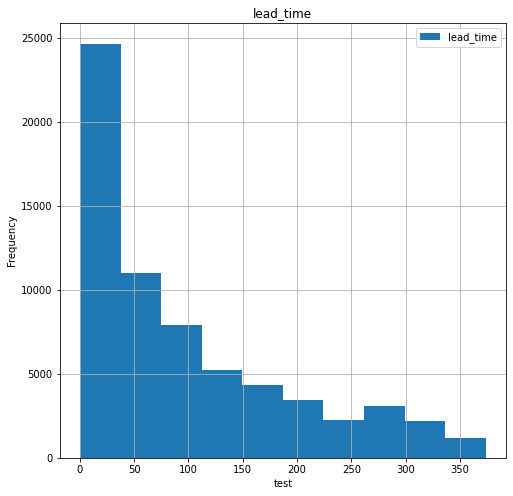

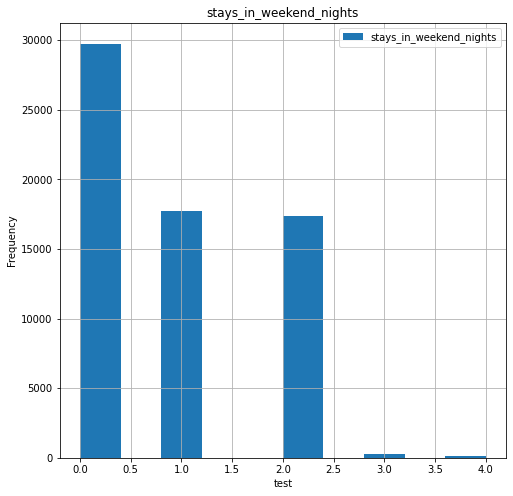

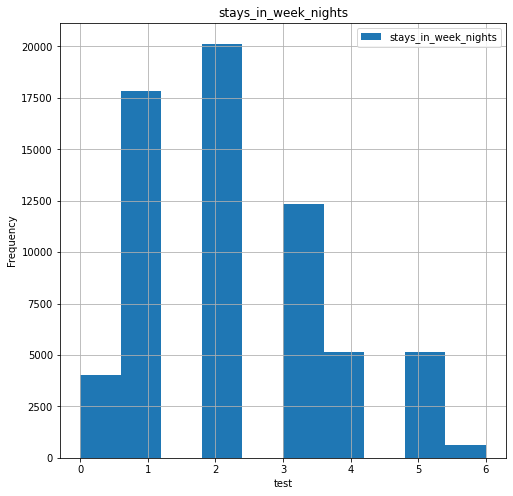

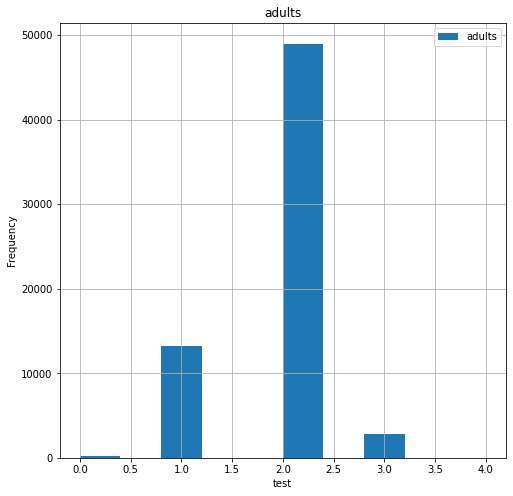

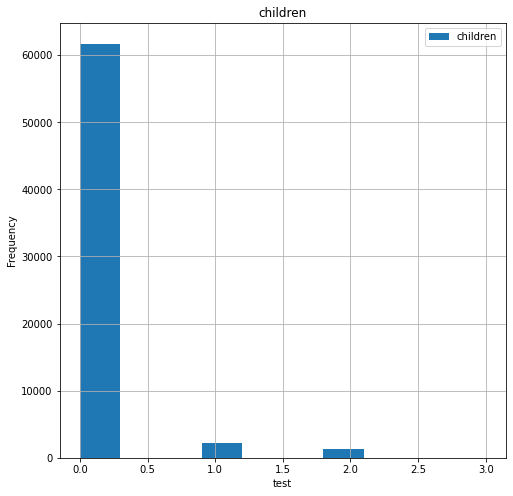

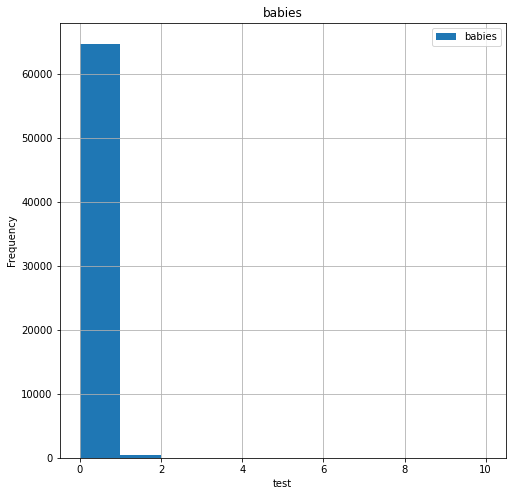

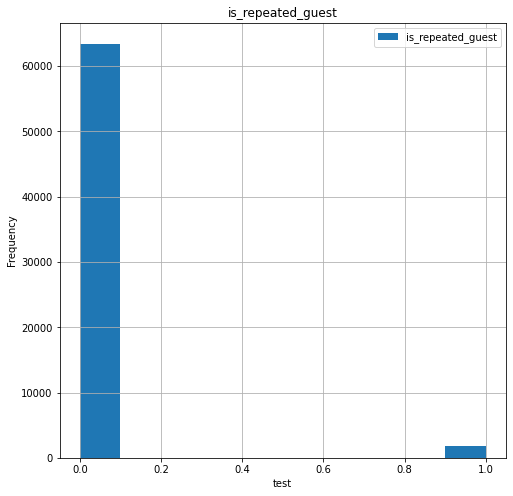

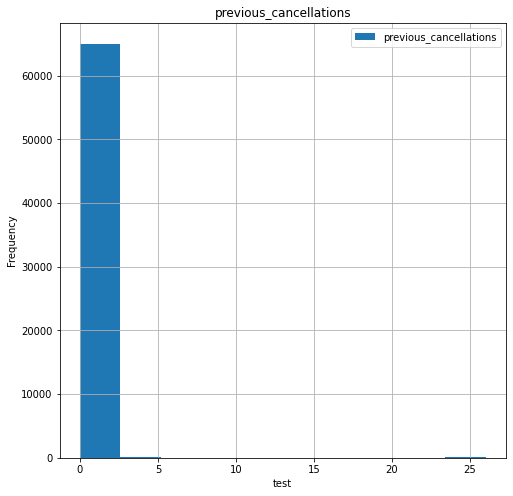

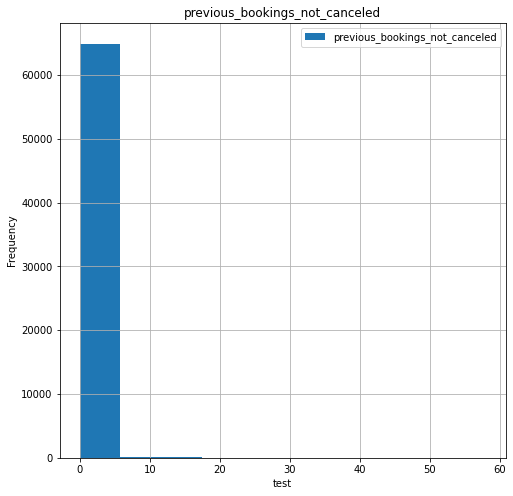

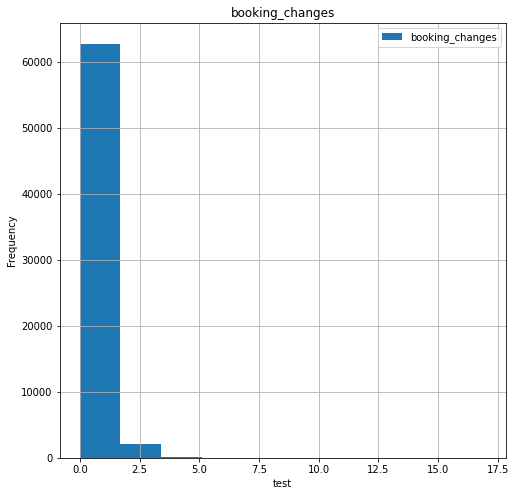

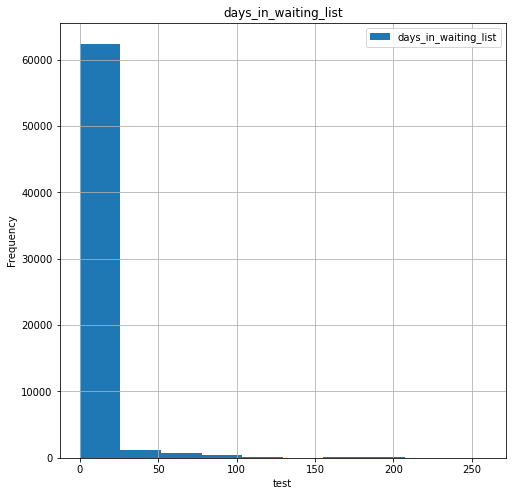

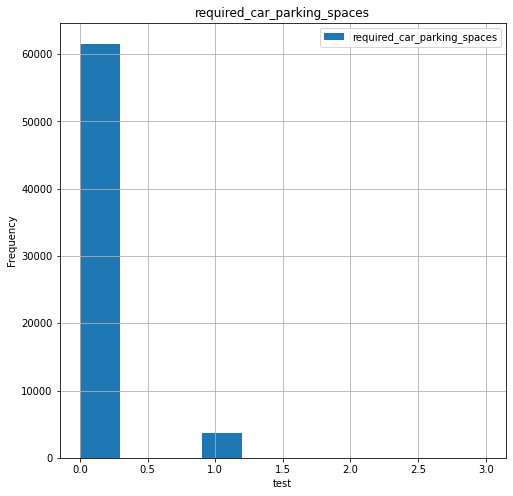

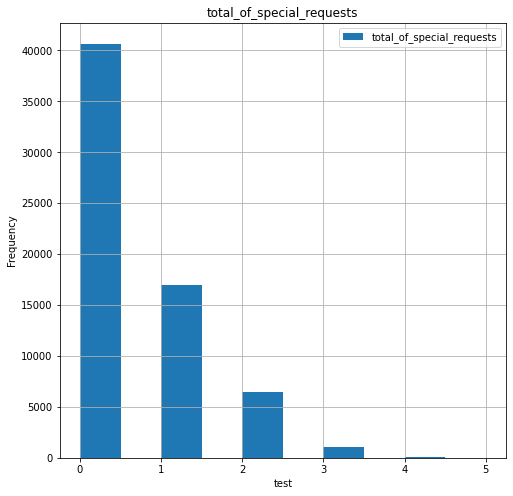

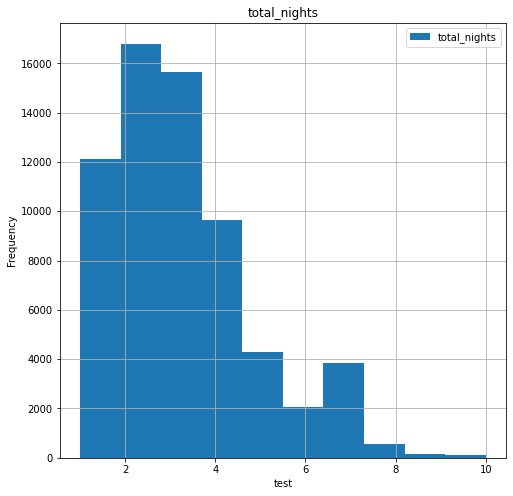

In [12]:
# Строим гистограммы по колонкам. 
for column in numeric_columns: 
        hotel_train.plot(
            y=column, 
            title=column, 
            kind='hist', 
            figsize=(8, 8),
            grid=True
        )
        plt.xlabel(key)
        plt.show()

In [13]:
# Считаем 0.95 и .099 квантиль.

data = []
quantile_95 = ['0.95-квантиль']
quantile_99 = ['0.99-квантиль']

for column in numeric_columns: 
    quantile_95.append(hotel_train[column].quantile(0.95))
    quantile_99.append(hotel_train[column].quantile(0.99))

data.append(quantile_95)
data.append(quantile_99)

In [14]:
columns = [
    'quantile',
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'total_nights'
]
# Отображаем квантили.
pd.DataFrame(data=data, columns=columns)

,quantile,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
0,0.95-квантиль,301.0,2.0,5.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,7.0
1,0.99-квантиль,349.0,2.0,5.0,3.0,2.0,0.0,1.0,1.0,2.0,3.0,96.0,1.0,3.0,8.0


In [15]:
# Убираем выбросы.
for key, val in hotel.items():
    val.loc[val['adults'] == 0, 'adults'] = val['adults'].median()
    val.loc[val['required_car_parking_spaces'] > 1, 'required_car_parking_spaces'] = 1

#### Общий комментарий по анализу

- id – номер записи, для ML и исследовательского анализа не нужен.  
- adults – значения от 0 до 4, 0 постояльцев быть не может, заменил на
медианное значение, 2 самое преобладающее значение.
- arrival_date_year – два значения для train (2015, 2016) и в test одно
– 2017, для ML думаю нецелесообразно.
- arrival_date_month  – полный набор месяцев есть только для 2016 года,
для 2017 тоже нет полного года, для анализа окупаемости придется генерировать
данные.
- arrival_date_week_number – полностью коррелируются с
arrival_date_month, для ML думаю нецелесообразно. 
- arrival_date_day_of_month – для ML думаю нецелесообразно.  
- babies – есть выброс максимальное значение 10, но .99 квантиль
показывает 0, для ML думаю нецелесообразно, очень мало записей мене 1% имеют
значения выше 0.
- booking_changes – изменения обычно или вообще нет или одно, есть явный
выброс в максимальном значении, предлагаю заменить их на 3, для ML не
применима, т.к. этот параметр может менять до окончательного заселения или
отмены брони.
- children – обычно или их нет реже значительно реже 1 максимальное
значение 3.
- country – очень много значений, для ML думаю нецелесообразно, можно
конечно поделить на регионы Азия, Европа и т.д.
- customer_type – все хорошо не явных дубликатов нет.
- days_in_waiting_list – обычно ожидание составляет 0 дней 0.95,
квантиль, для ML не применима, т.к. этот параметр не зависит от клиента, а
депозит надо запрашивать при заполнении.
- distribution_channel – все хорошо, неявных дубликатов нет.
- is_canceled – ключевой параметр значения 0 и 1, 63% на 37% не сильный
дисбаланс.
- is_repeated_guest – 0.95 квантиль 0. Для ML думаю нецелесообразно. В
данных для теста 0 и для 0.99 квантиля.    
- lead_time – отель довольно часто бронируют заранее.
- meal – есть дубликаты из-за лишних пробелов, исправил.
- previous_bookings_not_canceled – В отель, в основном, приезжают новые
гости, 0.95 квантиль 0 а 0.99 всего 2, для ML думаю нецелесообразно, т.к.
задача найти, кто отменит запись.  
- previous_cancellations – на первый взгляд очень важный параметр, кто
уже обменял, может отменить еще раз, но записей слишком мало с этим
параметром.
- required_car_parking_spaces – есть выбросы (8 мест), но такого
количества не может быть, требуется не боле одного места это коррелируется с
количеством взрослых 2 человека, присвоил всем значениям выше одного 1. 
- reserved_room_type – убрал лишние пробелы. 
- stays_in_weekend_nights – в пределах нормы, данные коррелируются с
общим количеством дней. Нулевые значения возможны.
- stays_in_week_nights – в пределах нормы, данные коррелируются с общим
количеством дней. Нулевые значения возможны.
- total_nights – максимальное значение 10 дней.
- total_of_special_requests – ничего подозрительного не нашел.

In [17]:
checking_days = pd.Series(
    data=hotel_train['total_nights'] - hotel_train['stays_in_weekend_nights'] - hotel_train['stays_in_week_nights'],
)

checking_days.value_counts()

0    65229
dtype: int64

### Формулировка ML-задачи на основе бизнес-задачи

In [18]:
# Объявляем функции seasonal_coefficient с параметром month,
# которая возвращает следующие сезонный коэффициент.

def seasonal_coefficient(month):
    try:                                    
        if month in ['December', 'January', 'February']:
            return 1
        elif month in ['September', 'October', 'November', 'March', 'April', 'May']:
            return 1.2
        elif month in ['July', 'August', 'June']:
            return 1.4
        else:
            return 1
    except:
        return 1

In [19]:
# Применяем функцию для вычисления сезонного коэффициента.
hotel_train['seasonal_coefficient'] = hotel_train['arrival_date_month'].apply(seasonal_coefficient)

In [20]:
# Объявляем функции profit_without_deposit с параметром data, per_night, serviceh,
# которая вычисляет прибыль(убыток) для каждой записи.

def profit_without_deposit(data, per_night, service):
    
    data['profit'] = data['seasonal_coefficient'] * (
        (1 - data['is_canceled']) * 
        (data['total_nights'] * data['reserved_room_type'].apply(per_night.get) 
                                 - ((data['total_nights'] + 1) // 2) * data['reserved_room_type'].apply(service.get)) - 
        (data['is_canceled']) * (data['reserved_room_type'].apply(per_night.get) + data['reserved_room_type'].apply(service.get)) 
    )

In [21]:
# Словарь тип номера-стоимость. 
per_night = {              
    'A': 1000,
    'B': 800,
    'C': 600, 
    'D': 550, 
    'E': 500, 
    'F': 450, 
    'G': 350
}

In [22]:
# Словарь тип номера-обслуживание/ 
service = {              
    'A': 400,
    'B': 350,
    'C': 350, 
    'D': 150, 
    'E': 150, 
    'F': 150, 
    'G': 150
}

In [23]:
# Применяем функцию для вычисления прибыли(убытки).
profit_without_deposit(hotel_train, per_night, service)

In [24]:
# Проверка работы функции
hotel_train[['arrival_date_month',  'reserved_room_type', 'total_nights', 'profit']]

,arrival_date_month,reserved_room_type,total_nights,profit
0,July,A,1,840.0
1,July,A,2,2240.0
2,July,C,2,1190.0
3,July,C,2,1190.0
4,July,A,3,-1960.0
...,...,...,...,...
65224,December,D,6,2850.0
65225,December,D,5,2300.0
65226,December,D,6,2850.0
65227,December,A,7,5400.0


In [25]:
# Вычисляем прибыль для 2016 года 
hotel_train.loc[hotel_train['arrival_date_year'] == 2016, 'profit'].sum()

47684530.0

In [26]:
# Вычисляем убыток от отмены брони для 2016 год.
hotel_train.loc[(hotel_train['arrival_date_year'] == 2016) & (hotel_train['profit'] < 0), 'profit'].sum()

-25474070.0

In [27]:
# Делаем bootstrap.
state = np.random.RandomState(12345)
values = []
for i in range(1000): 
    subsample = hotel_train.sample(
            47000, 
            replace=True, 
            random_state=state
        )
    values.append(subsample['profit'].sum())
values = pd.Series(values)

In [28]:
print(f'Среднее по 1000 выборкам {values.mean()}')

Среднее по 1000 выборкам 46575723.74


In [29]:
print(f'0.05-квантиль по 1000 выборкам {values.quantile(0.05)}')

0.05-квантиль по 1000 выборкам 45754858.0


In [30]:
print(f'0.95-квантиль по 1000 выборкам {values.quantile(0.095)}')

0.95-квантиль по 1000 выборкам 45901329.05


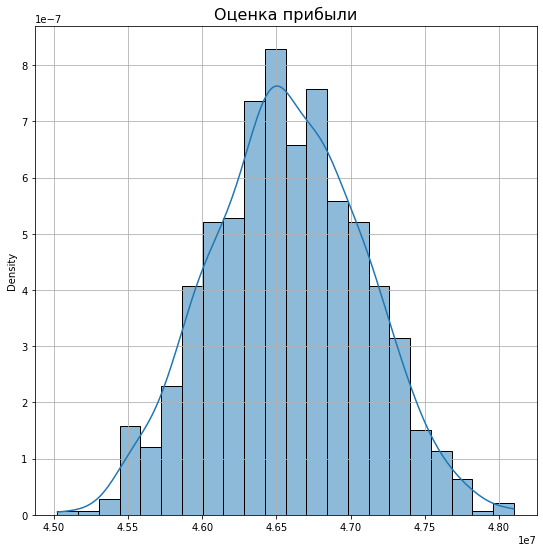

In [31]:
# Строим график распределения
plt.subplots(figsize=(9, 9))
plt.title('Оценка прибыли', fontsize=16)
sns.histplot(      # гистограммы плотности
            values, 
            kde=True,
            stat="density", 
            linewidth=1)       
plt.grid(True)
plt.show()

**Вывод** 
Сеть отелей теряет существенные чать прибыли (34% недополученой прибыли) из-за отказов. 

### Разработка модели ML

#### Подготовка данных для ML

In [32]:
# Вычисляем баланс классов 
hotel_train['is_canceled'].value_counts(normalize=True)

0    0.631391
1    0.368609
Name: is_canceled, dtype: float64

In [33]:
features_columns = [ # Список признаков
    'lead_time',                       
    'adults',                          
    'children',                        
    'meal',                            
    'distribution_channel',            
    'previous_cancellations',          
    'reserved_room_type',              
    'customer_type',                   
    'required_car_parking_spaces',     
    'total_of_special_requests',       
    'total_nights'                    
]

features_train = hotel_train[features_columns]  

features_train = pd.get_dummies( # OHE признаков на тренировочных данных
    features_train,
    drop_first=True,
    columns=['meal', 'distribution_channel', 'customer_type', 'reserved_room_type']
)

In [34]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   lead_time                      65229 non-null  float64
 1   adults                         65229 non-null  float64
 2   children                       65229 non-null  float64
 3   previous_cancellations         65229 non-null  int64  
 4   required_car_parking_spaces    65229 non-null  int64  
 5   total_of_special_requests      65229 non-null  int64  
 6   total_nights                   65229 non-null  int64  
 7   meal_FB                        65229 non-null  uint8  
 8   meal_HB                        65229 non-null  uint8  
 9   meal_SC                        65229 non-null  uint8  
 10  distribution_channel_Direct    65229 non-null  uint8  
 11  distribution_channel_GDS       65229 non-null  uint8  
 12  distribution_channel_TA/TO     65229 non-null 

In [35]:
target_train = hotel_train['is_canceled'] # Целевой признак тренеровочный

In [36]:
features_test = hotel_test[features_columns] 

features_test = pd.get_dummies( # OHE признаков на тестовых данных
    features_test,
    drop_first=True,
    columns=['meal', 'distribution_channel', 'customer_type', 'reserved_room_type']
)

In [37]:
target_test = hotel_test['is_canceled'] # Целевой признак тестовый

In [38]:
# Функция для вывода значений Precision, Recall, F1-мера, AUC-ROC по обученной модели
# со следующими параметрами:
#    - значения признаков;
#    - значения целевого признака;
#    - обученная модель. 

def print_metrics(features, target, model): 
    
    predicted = model.predict(features)
    probabilities_one = model.predict_proba(features)[:, 1] 

    print(f'Precision: {precision_score(target, predicted):.3f}')
    print(f'Recall: {recall_score(target, predicted):.3f}')
    print(f'F1-мера: {f1_score(target, predicted):.3f}')
    print(f'AUC-ROC: {roc_auc_score(target, probabilities_one): .3f}')

#### Логистическая регрессия

In [39]:
parameters = {'max_iter': [1000]} # Список параметров.

In [40]:
rf = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') # Постоянный гиперпараметры модели.

In [41]:
# Сетка гиперпараметров и параметры кросс-валидация.
lr_model = GridSearchCV(rf, parameters, scoring='roc_auc', cv=6, n_jobs=-1)  

In [42]:
%%time
lr_model.fit(features_train, target_train) # Обучение логистической регрессии.

CPU times: user 2.13 s, sys: 502 ms, total: 2.63 s
Wall time: 4.78 s


GridSearchCV(cv=6,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=12345,
                                          solver='liblinear'),
             n_jobs=-1, param_grid={'max_iter': [1000]}, scoring='roc_auc')

In [43]:
print_metrics(features_train, target_train, lr_model.best_estimator_) # Вычисляем метрики на тренеровочных данных.

Precision: 0.623
Recall: 0.727
F1-мера: 0.671
AUC-ROC:  0.817


In [44]:
print_metrics(features_test, target_test, lr_model.best_estimator_) # Вычисляем метрики на тестовых данных.

Precision: 0.589
Recall: 0.697
F1-мера: 0.638
AUC-ROC:  0.768


In [45]:
# Функция threshold_predict для подбора порога, для тренировочных данных и вывода значений Precision, Recall, F1-мера,  
# вывода значений Precision, Recall, F1-мера, для тестовых со следующими параметрами:
#    - обученная модель
#    - значения признаков тренировочных данных;
#    - значения целевого признака тренировочных данных;
#    - значения признаков тестовых данных;
#    - значения целевого признака тестовых данных. 

def threshold_predict(model, features_train, target_train, features_test, target_test):
    probabilities_one_train = model.best_estimator_.predict_proba(features_train)[:, 1] 

    f1_best = 0
    threshold_best = -1

    for threshold in np.arange(0, 1.01, 0.01): # цикл со смещением порога
        predicted_train = probabilities_one_train >= threshold  # 
        f1 = f1_score(target_train, predicted_train)
        if f1 > f1_best:
            f1_best = f1
            threshold_best = threshold
            
    probabilities_one_test = model.best_estimator_.predict_proba(features_test)[:, 1] 
    precision = precision_score(target_test, probabilities_one_test > threshold_best) 
    recall = recall_score(target_test, probabilities_one_test > threshold_best)
    f1 = f1_score(target_test, probabilities_one_test > threshold_best)  
    
    print(f'Лучшая f1-мера на тренировочных данных {f1_best:.3f}')
    print('С подбором порога')   
    print(f'Precision на тестовых: {precision:.3f}')
    print(f'Recall на тестовых: {recall:.3f}')
    print(f'F1-мера на тестовых: {f1:.3f}')

In [46]:
# Вычисление метрики с учетом подбора порога.
threshold_predict(lr_model, features_train, target_train, features_test, target_test) 

Лучшая f1-мера на тренировочных данных 0.685
С подбором порога
Precision на тестовых: 0.656
Recall на тестовых: 0.624
F1-мера на тестовых: 0.640


In [ ]:
lr_model.best_estimator_.

#### Дерево решений

In [47]:
parameters = { # Список параметров.
    'max_depth': [4, 6, 8 , 10, 12, 14, 16],
    'max_features': [4]
}

In [48]:
rf = DecisionTreeClassifier(random_state=12345, class_weight='balanced') # Постоянный гиперпараметры модели.

In [49]:
# Сетка гиперпараметров и параметры кросс-валидация.
dtc_model = GridSearchCV(rf, parameters, scoring='roc_auc', cv=6, n_jobs=-1) 

In [50]:
%%time
dtc_model.fit(features_train, target_train) # Обучение дерева решений.

CPU times: user 2.51 s, sys: 6.43 ms, total: 2.52 s
Wall time: 5.08 s


GridSearchCV(cv=6,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': [4]},
             scoring='roc_auc')

In [51]:
dtc_model.best_params_ # Лучшие гиперпараметры.

{'max_depth': 8, 'max_features': 4}

In [52]:
print_metrics(features_train, target_train, dtc_model.best_estimator_) # Вычисляем метрики на тренеровочных данных.

Precision: 0.717
Recall: 0.595
F1-мера: 0.650
AUC-ROC:  0.810


In [53]:
print_metrics(features_test, target_test, dtc_model.best_estimator_) # Вычисляем метрики на тестовых данных.

Precision: 0.638
Recall: 0.526
F1-мера: 0.576
AUC-ROC:  0.744


In [54]:
# Вычисление метрики с учетом подбора порога.
threshold_predict(dtc_model, features_train, target_train, features_test, target_test)

Лучшая f1-мера на тренировочных данных 0.651
С подбором порога
Precision на тестовых: 0.604
Recall на тестовых: 0.564
F1-мера на тестовых: 0.583


#### Сучайный лес

In [55]:
parameters = { # Список параметров.
    'n_estimators': [100, 500, 1000],
    'max_depth': [8, 16],
    'max_features': [4]
}

In [56]:
rf = RandomForestClassifier(random_state=12345, class_weight='balanced') # Постоянный гиперпараметры модели.

In [57]:
rfc_model = GridSearchCV(rf, parameters, scoring='roc_auc', cv=6, n_jobs=-1) 

In [58]:
%%time
rfc_model.fit(features_train, target_train) # Обучение случайного леса.

CPU times: user 7min 47s, sys: 1.55 s, total: 7min 49s
Wall time: 11min 4s


GridSearchCV(cv=6,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16], 'max_features': [4],
                         'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

In [59]:
rfc_model.best_params_ # Лучшие гиперпараметры.

{'max_depth': 8, 'max_features': 4, 'n_estimators': 1000}

In [60]:
print_metrics(features_train, target_train, rfc_model.best_estimator_) # Вычисляем метрики на тренеровочных данных.

Precision: 0.760
Recall: 0.661
F1-мера: 0.707
AUC-ROC:  0.863


In [61]:
print_metrics(features_test, target_test, rfc_model.best_estimator_) # Вычисляем метрики на тестовых данных.

Precision: 0.691
Recall: 0.563
F1-мера: 0.621
AUC-ROC:  0.794


In [62]:
# Вычисление метрики с учетом подбора порога.
threshold_predict(rfc_model, features_train, target_train, features_test, target_test)

Лучшая f1-мера на тренировочных данных 0.719
С подбором порога
Precision на тестовых: 0.652
Recall на тестовых: 0.642
F1-мера на тестовых: 0.647


#### Оценка прибыли

In [63]:
DEPOSIT = .8 # Коэффициент депозита 
MODEL_COSTS = 4e5 # Затраты на модель

In [64]:
# Применяем функцию для вычисления сезонного коэффициента.
hotel_test['seasonal_coefficient'] = hotel_test['arrival_date_month'].apply(seasonal_coefficient)

In [65]:
# Применяем функцию для вычисления прибыли(убытки).
profit_without_deposit(hotel_test, per_night, service)

In [66]:
# Делаем прогноз.
predicted_test = lr_model.best_estimator_.predict(features_test)
predicted_test = pd.Series(predicted_test, index=target_test.index)

In [67]:
hotel_test['predicted'] = predicted_test

In [68]:
# Коректируем прибыль с учетом прогноза.
hotel_test.loc[hotel_test['is_canceled'] + hotel_test['predicted'] == 2 ,'profit'] = hotel_test['profit'] * (1-DEPOSIT)

In [69]:
# Делаем bootstrap.
state = np.random.RandomState(12345)
values = []
for i in range(1000): # запускаем bootstrap
    subsample = hotel_test.sample(
            47000, 
            replace=True, 
            random_state=state
        )
    values.append(subsample['profit'].sum() - MODEL_COSTS)
values = pd.Series(values)

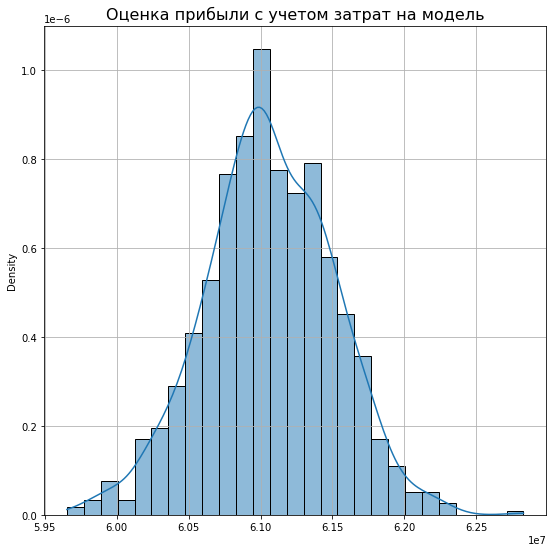

In [70]:
# Строим график распределения
plt.subplots(figsize=(9, 9))
plt.title('Оценка прибыли c учетом затрат на модель', fontsize=16)
sns.histplot(      # гистограммы плотности
            values, 
            kde=True,
            stat="density", 
            linewidth=1)       
plt.grid(True)
plt.show()

In [71]:
print(f'Среднее по 1000 выборкам {values.mean()}')

Среднее по 1000 выборкам 61060811.434


In [72]:
state = np.random.RandomState(12345)
values = []
for i in range(1000): # запускаем bootstrap
    subsample = hotel_test.sample(
            47000, 
            replace=True, 
            random_state=state
        )
    subsample_del = subsample[subsample['predicted'] == 1].sample(
            hotel_test[hotel_test['predicted'] == 1].shape[0] // 2, 
            random_state=state
        )
    subsample = subsample.drop(index=subsample_del.index)
    values.append(subsample['profit'].sum() - MODEL_COSTS)
values = pd.Series(values)

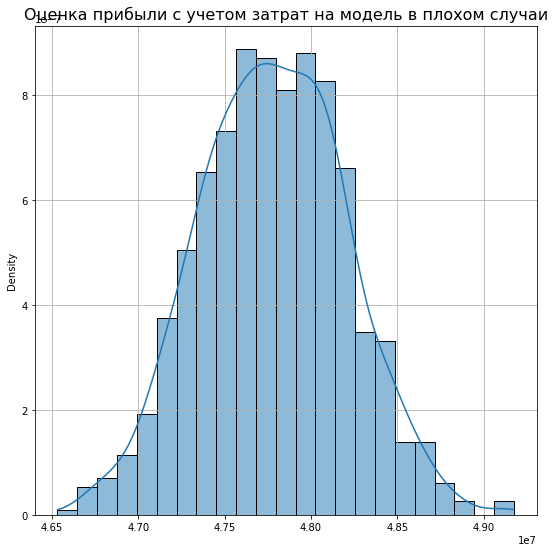

In [73]:
# Строим график распределения
plt.subplots(figsize=(9, 9))
plt.title('Оценка прибыли c учетом затрат на модель в плохом случаи', fontsize=16)
sns.histplot(      # гистограммы плотности
            values, 
            kde=True,
            stat="density", 
            linewidth=1)       
plt.grid(True)
plt.show()

In [74]:
print(f'Среднее по 1000 выборкам {values.mean()}')

Среднее по 1000 выборкам 47781333.836


#### Выводы по результатам моделирования 

1. На тренировочных данных наблюдается дисбаланс классов;
2. Для поиска лучших гиперпараметров был использована метрика ROC-AUC;
3. Дальше уже в рамках обученных моделей провели улучшения метрики F1, путем подбора порога на тренировочных данных;
4. Подобранные пороги использовали для вычисления у же на тестовых;
5. Самая высокое значении F1 получились для модели случайный лес, но в рамках поставленной задачи нас больше интересует метрика Recall т.к. каждый выявленный потенциальный отказчик это прибыль.
6. Для оценки прибыли выбрали самую лучшую модель по показателю Recall – логистическую регрессию без подбора порога (порог 0.5).
7. Прибыль с учетом затрат на модель возросла на 30%. 
8.  Конечно можно было  подобрать такие параметры порогов которые дали бы Recall на уровне близким к 100%, но в этом случаи это просто  запрос депозита у всех клиентов, что противоречит изначальной стратегии сети по уходу от депозитов.

### Портрет «ненадёжного» клиента

In [75]:
columns = [       # Колонки для анализа              
    'adults',                          
    'children',
    'meal',                            
    'distribution_channel',                     
    'reserved_room_type',              
    'customer_type',                   
    'required_car_parking_spaces',     
    'total_of_special_requests',       
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'total_nights'
]

In [76]:
hotel_train['meal'].value_counts()

BB    51697
HB     7292
SC     5789
FB      451
Name: meal, dtype: int64

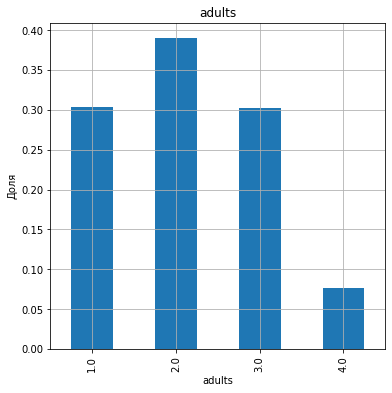

2.0    49146
1.0    13212
3.0     2858
4.0       13
Name: adults, dtype: int64


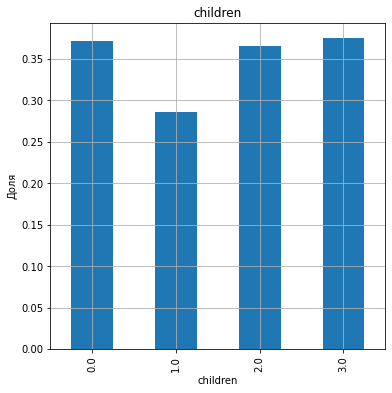

0.0    61712
1.0     2165
2.0     1336
3.0       16
Name: children, dtype: int64


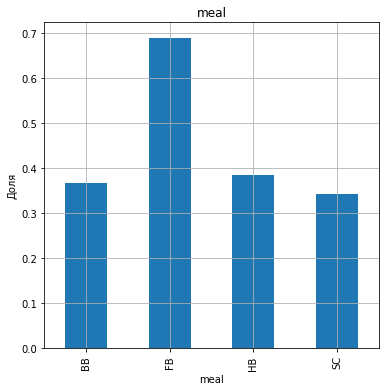

BB    51697
HB     7292
SC     5789
FB      451
Name: meal, dtype: int64


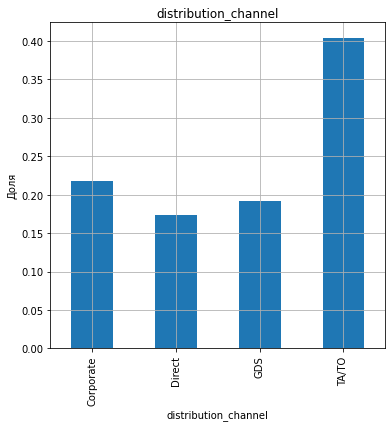

TA/TO        54454
Direct        6853
Corporate     3823
GDS             99
Name: distribution_channel, dtype: int64


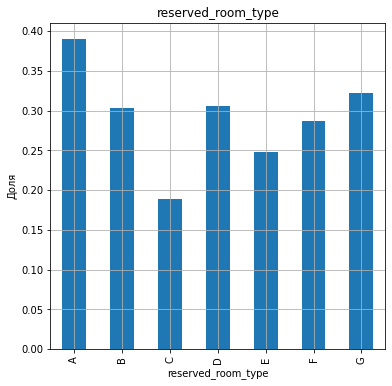

A    50501
D     9387
E     2448
F     1213
B      860
G      592
C      228
Name: reserved_room_type, dtype: int64


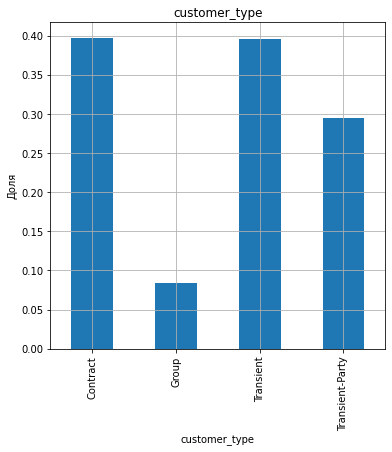

Transient          45493
Transient-Party    16703
Contract            2746
Group                287
Name: customer_type, dtype: int64


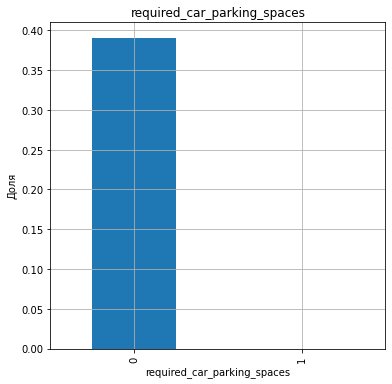

0    61547
1     3682
Name: required_car_parking_spaces, dtype: int64


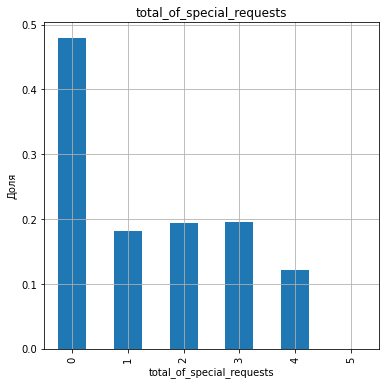

0    40671
1    16958
2     6444
3     1036
4      107
5       13
Name: total_of_special_requests, dtype: int64


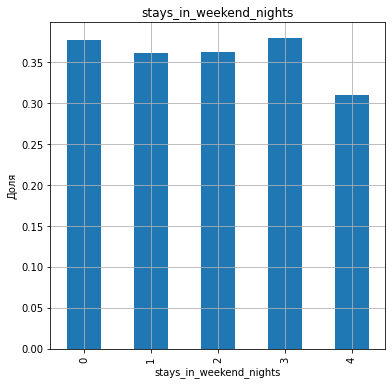

0    29738
1    17721
2    17357
3      261
4      152
Name: stays_in_weekend_nights, dtype: int64


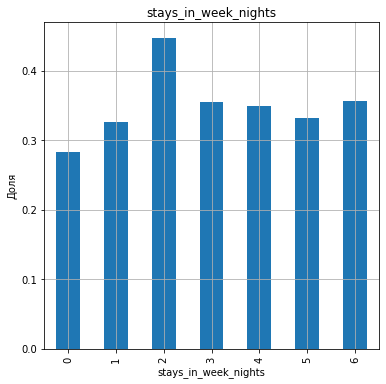

2    20137
1    17850
3    12341
4     5131
5     5128
0     4007
6      635
Name: stays_in_week_nights, dtype: int64


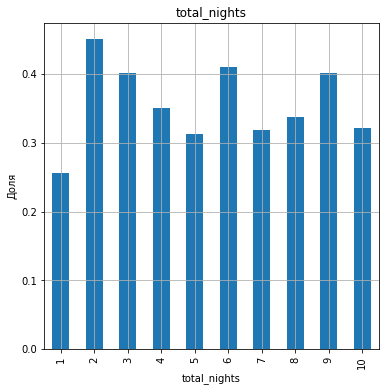

2     16795
3     15652
1     12122
4      9629
5      4288
7      3853
6      2078
8       542
9       152
10      118
Name: total_nights, dtype: int64


In [77]:
# Цикл построения столбчатых диаграмм, по колонкам и их значениям.
# диаграммы отображают долю отказов по тому или иному значению (категории). 

for column in columns:
    column_values = hotel_train[column].sort_values().unique()
    
    cancelled_shape = []
    for val in column_values:
        count_all = hotel_train[hotel_train[column] == val].shape[0]
        count_cancelled = hotel_train[hotel_train[column] == val]['is_canceled'].sum()
        cancelled_shape.append(count_cancelled / count_all) 
    
    pd.Series(cancelled_shape, index=column_values).plot(                                                       
    kind='bar',
    figsize=(6, 6),
    grid=True,
    title = column
    )
    
    plt.xlabel(column)
    plt.ylabel('Доля')
    plt.show()
    print(hotel_train[column].value_counts())

**Описание «ненадежного» клиента**

- Клиенты, которые бронируют самые дорогие (категория А) номера от них чаще всего и отказываются это происходит почти в 40% случаев от общего числа их бронирования. Это очень невыгодно отелю.
- Клиенты, которые берут полный пансион (FB) также ненадежны. 
- Канал TA/TO для дистрибьюции каналов также является очень не надежным.
- Юридические лица и несвязанные с договором и групповым заездом тоже не очень надежны. Групповые заезды самые надежные.
- Люди без машин мнее надежны, хотя по запросу на места для авто, очень мало данных и тут сложно судить.
- Люди, не оставляющие специальных пометок тоже должны вызывать подозрения, скорее всего они плохо продумали свою поездку.
- На 2 будних дня останавливаются те, кто чаще всего обменяют бронь. 

Видно, что за редким исключение – под это описание подходят большинство потенциальных клиентов.  

### Общий вывод

Если ориентироваться на имеющиеся условия, то модель, которая обеспечивает максимальный параметр recall принесет сети наибольшую прибыль. Но тем самым мы решаем задачу на максимизацию без ограничений и получается, что верное решение — это вернуть всем депозиты recall = 1.
Необходимо рассматривать эту задачу в совокупности с ограничениями, которые могут возникнуть с оттоком клиентов и недозагруженностью отеля. Необходимо понимать ценность параметра Precision. И какой убыток несет каждое не верная оценка только уже в другую сторону.

Как можно понять т.к данные не сбалансированы, важным аспектом является подбор порога, т.к. мы не знаем какое-будет соотношение этого порога в общей совокупности, этот параметр необходимо пересматривать с учетом накопления данных, что обеспечить, лучшее прогнозирование. 

Рекомендации:
- Оказаться от услуги полного пансиона (она получается очень рискованной, а также еще и не востребована).
- Пересмотре каналы дистрибьюции.
- Расширить парковку, клиенты с автомобилями более надежны.
- Пересмотреть политику цен, а то получается, что сеть отелей состоит в основном из категории А, что очень странно 80% это высшая категория.